## Programming Task 1

In [1]:
import pandas as pd

In [2]:
employee_df = pd.read_csv('employee_survey_data.csv')

In [3]:
# a) Get Dimensionality 
employee_df.shape

(4410, 4)

In [4]:
# b) Count rows with at least one NaN value
sum(employee_df.isna().any(axis=1))

83

In [5]:
# c) Find out max satisfcation level
max_satisfaction = employee_df["JobSatisfaction"].max()

In [6]:
# Filter employees by satisfaction level and count
employee_df[employee_df["JobSatisfaction"]==max_satisfaction].shape

(1367, 4)

## Programming Task 2

#### Short Overview of the Object Structure of MatPlotLib

In [7]:
# Import releant libs
import matplotlib.pyplot as plt
import numpy as np

# Source: https://realpython.com

matplotlib.figure.Figure

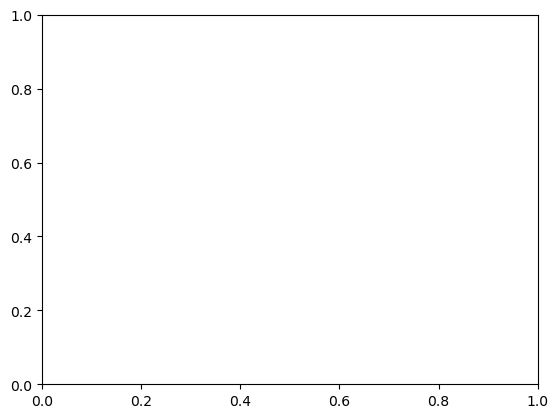

In [8]:
# Create toy plot
fig, _ = plt.subplots() # _ is the "wildcard" variable i.e., throw the content away.  
type(fig)

In [9]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

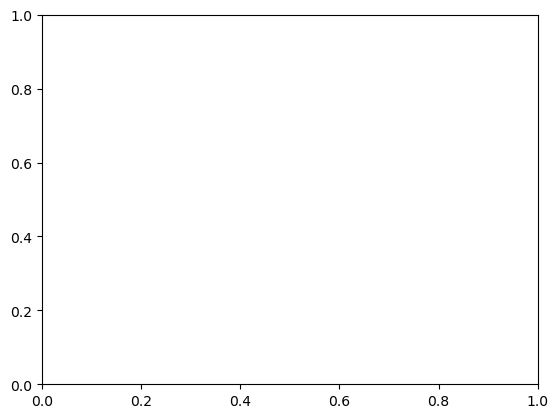

In [10]:
# NOTE: From here on, we work with the stateless (object-orientied approach) to plot figures
# Create fig and ax objects
fig, ax = plt.subplots() # Only time we use pyplot to create the initial objects 

In [11]:
# Subplots
type(ax)

matplotlib.axes._subplots.AxesSubplot

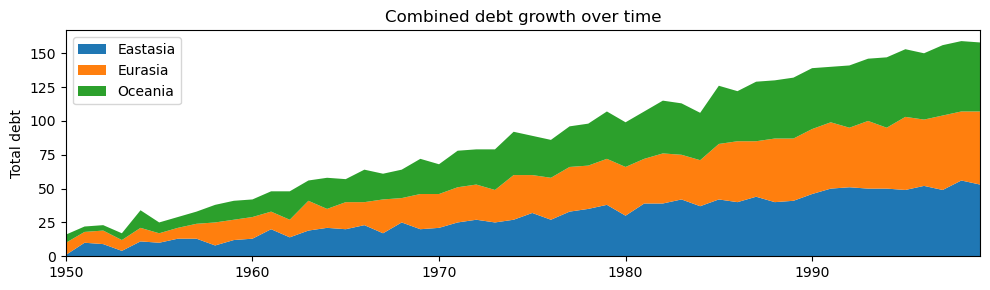

In [10]:
# Create three random time series objects of size (3, 50)
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

# Create fig and ax objects 
fig, ax = plt.subplots(figsize=(10, 3)) # figsize(float, float) - width, height in inches.

# Create a stacked plot object directly
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])

# Set the title of the figure (ax)
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])

fig.tight_layout() # clean up whitespace padding

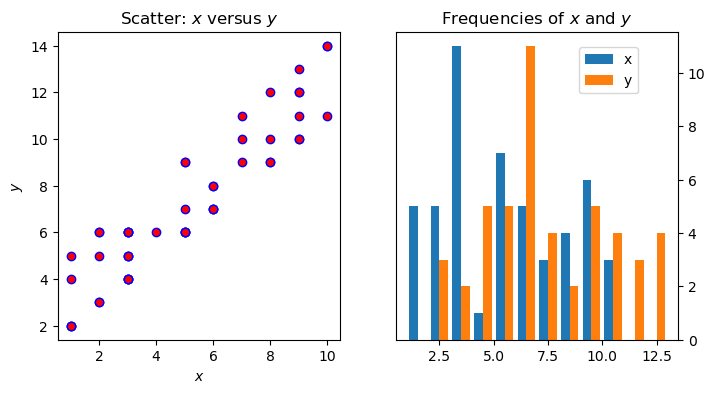

In [12]:
# Create random numbers
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y)) # create tuples based on x and y

# Create figure and TWO axes objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Create first figure
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

## Create second figure
ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

# Good luck doing this with pure plt functions....

In [14]:
# Verify tree structure:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

#### Working with pure matplotlib objects - More than two axes 

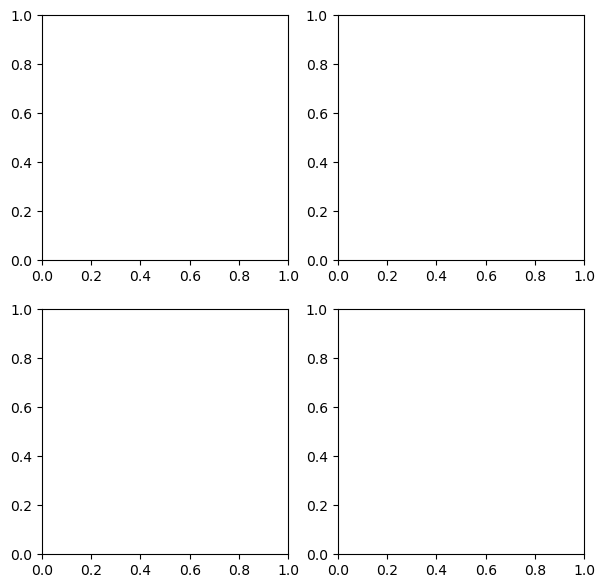

In [15]:
# What do we get by executing this?
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

In [16]:
# We get a 2 dimensional array of axes objects
type(ax)

numpy.ndarray

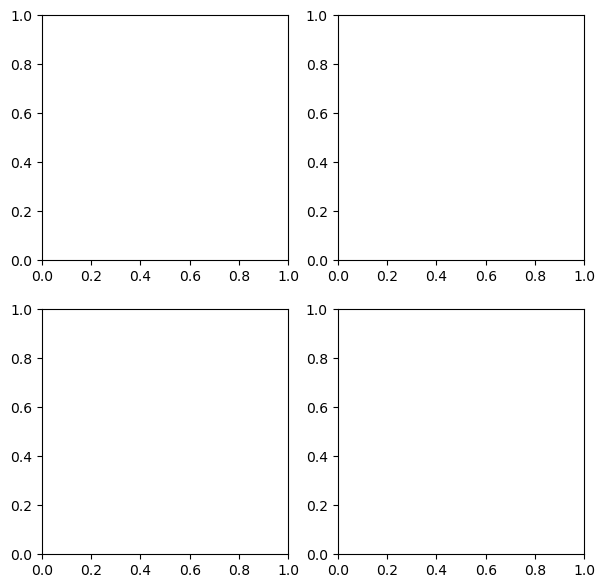

In [17]:
# But working with 2D arrays is annoying...
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d

# Now we can work with each axes object (ax1, ..., ax4) 

## Cool thing, but how can we make differnt sized axis?

## Revisiting our problem

<img src="resources/img1.png">

In [17]:
# Load some example data
from io import BytesIO
import tarfile
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [18]:
# extract toy columns
y = housing[:, -1] 
pop, age = housing[:, [4, 7]].T

<img src="resources/img2.png">

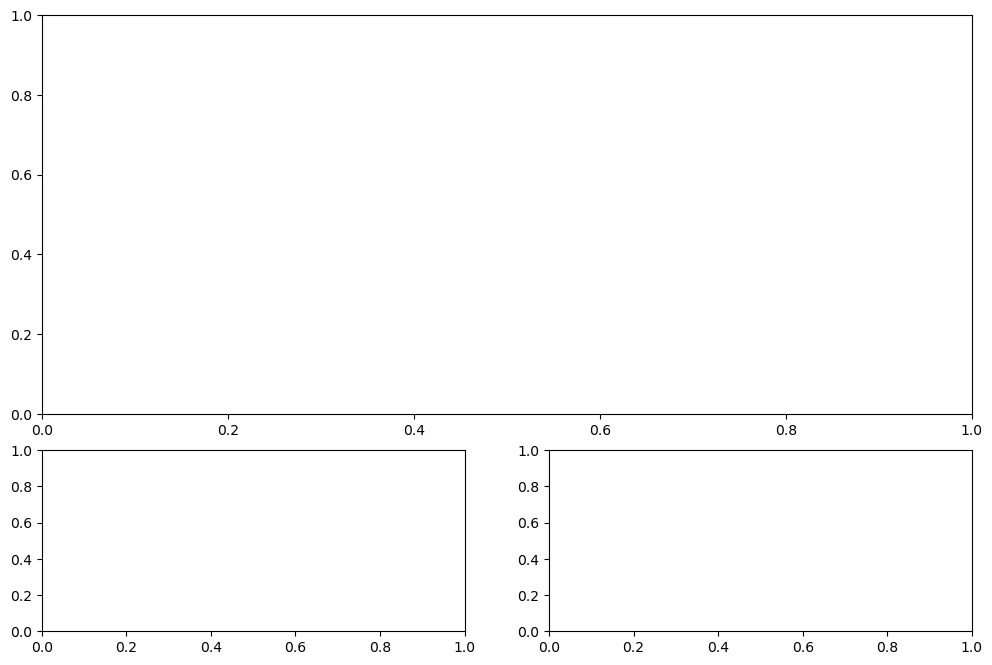

In [19]:
#Matplotlib’s gridspec module allows for more subplot customization. 
#pyplot’s subplot2grid() interacts with this module nicely. Let’s say we want to create a layout like this:

gridsize = (3, 2)  # Grid matrix with 3 rows and 2 columns 

fig = plt.figure(figsize=(12, 8)) # Width, height in inches.

ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # Start Location (0, 0)-spans over 2 rows and 2 columns
ax2 = plt.subplot2grid(gridsize, (2, 0)) # Start Location (2, 0) i.e., last row and first column
ax3 = plt.subplot2grid(gridsize, (2, 1)) # Start Location (2, 1) i.e., last row second column

In [20]:
# Define custom set title function 
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax



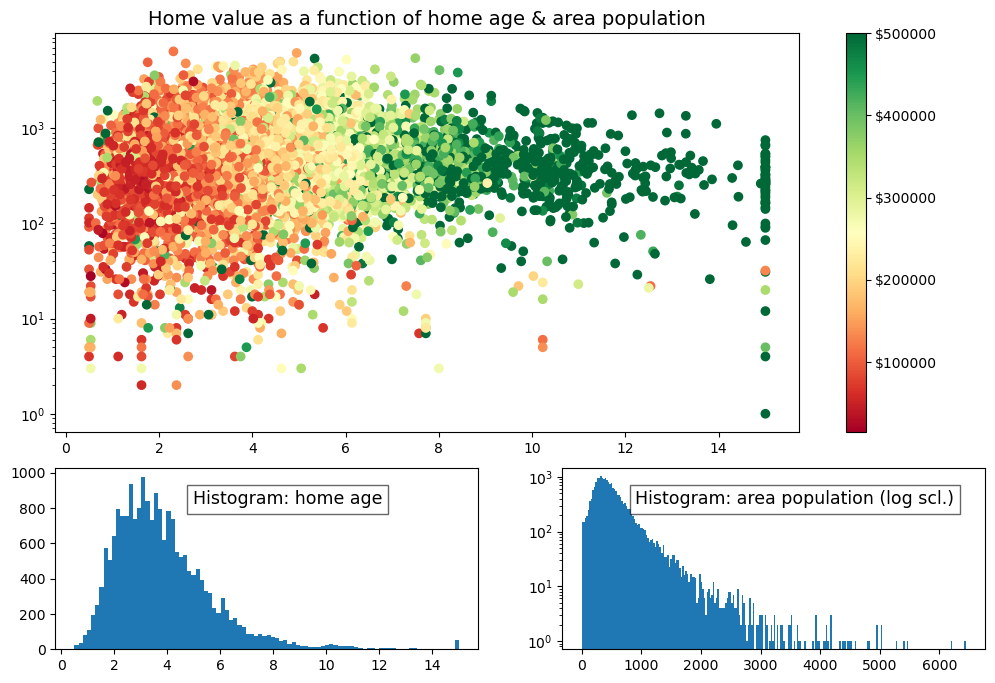

In [21]:
# Plot all three figures with respective axes objects
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn') # Add scatter plot to axes object

# Canvas 
fig.colorbar(sctr, ax=ax1, format='$%d') # Add colorbar to scatter plot (this needs to be done with the fig object)

ax1.set_yscale('log')

######


ax2.hist(age, bins='auto') # Add histogram to axes object

ax3.hist(pop, bins='auto', log=True) # Add histogram to axes object

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

fig